# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
## 1. Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [1]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    age <- runif(sample_size, min = age_lo, max = age_hi)
    
    x_no_noise <- beta_xa * age + beta_x0 
    noise_x <- rnorm(sample_size, mean(x_no_noise), sd_x)
    x <- x_no_noise + noise_x
    
    c_no_noise <- beta_ca * age + beta_cx * x + beta_c0
    noise_c <- rnorm(sample_size, mean(c_no_noise), sd_c)
    c <- c_no_noise + noise_c
    
      return(data.frame(age=age,x=x,c=c)) # it's actually bad form to have a variable named "c" in R, my bad...
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
dat

age,x,c
<dbl>,<dbl>,<dbl>
193.35634,172.46975,1234.6240
151.71249,106.23128,1030.7565
153.50371,178.27817,1030.8008
159.54579,113.42089,1014.7738
117.10238,188.24716,1148.1027
149.80362,89.29308,829.3347
184.76902,63.92314,879.9070
125.39324,115.23982,921.9536
123.75059,191.66910,1263.2273


---
## 2. Visualizing Data (1 point)

Load the `tidyverse` library.

In [2]:
library(tidyverse)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



a) Plot the relationship between age and reading comprehension. 

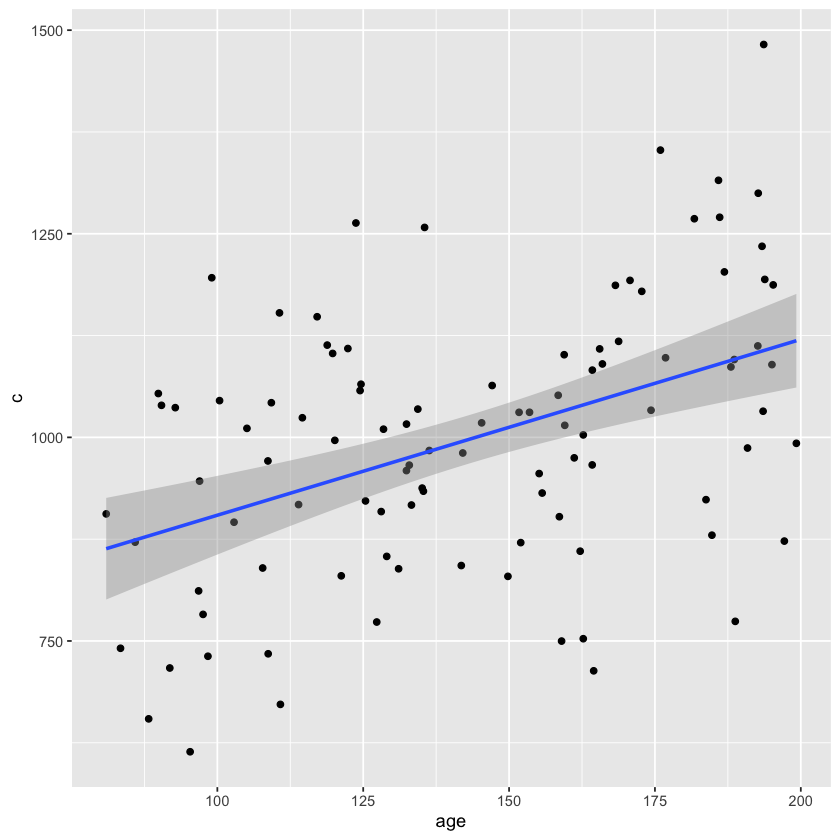

In [3]:
age_c_plot <- ggplot(aes(x = age, y = c), data = dat) +
geom_point() +
geom_smooth(method = 'lm', formula = y ~ x)

age_c_plot



b) Plot the relationship between reading experience, age, and reading comprehension.

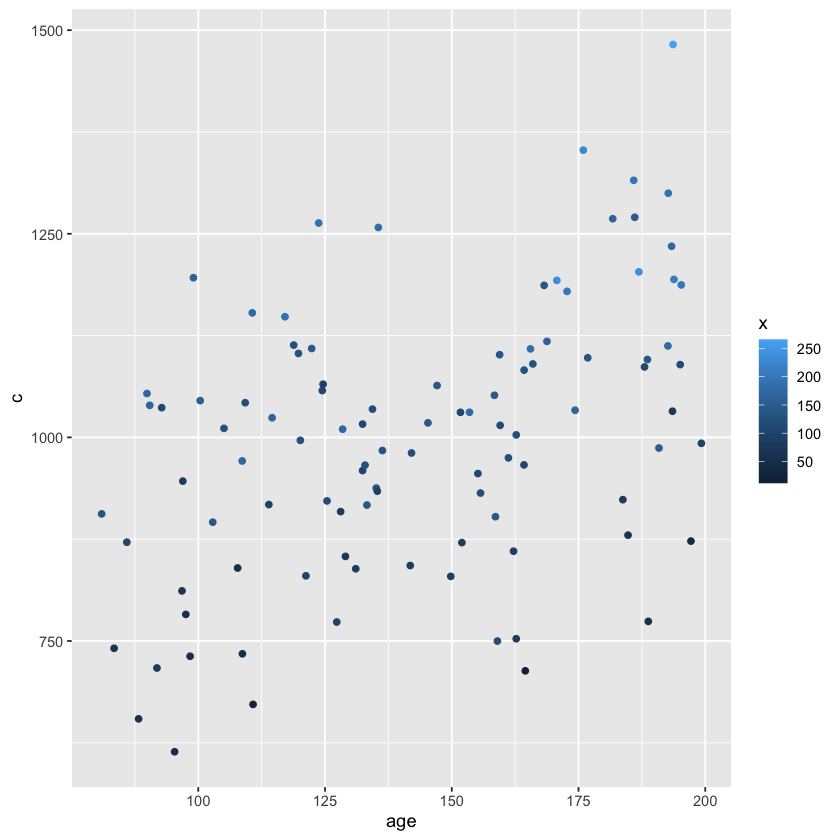

In [4]:
age_c_x_plot <- ggplot(aes(x = age, y = c, color = x), data = dat) +
geom_point()

age_c_x_plot

#I couldn't figure out how to get a regression line on this one, I hope I still satisfy the requirements for this question

---
## 3. Mediation Analysis (3 points)

Load the `mediation` library.

In [7]:
install.packages('mediation')

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘zoo’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘mvtnorm’, ‘sandwich’, ‘lpSolve’, ‘Hmisc’





The downloaded binary packages are in
	/var/folders/1z/t3c0jklx1v70qk4jxjj4kx_h0000gn/T//RtmpsNqCp3/downloaded_packages


In [8]:
library(mediation)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [14]:
#Using the method from the mediation and moderation tutorial

fitM <- lm(x ~ age, data = dat)
fitY <- lm(c ~ age + x, data = dat)
summary(fitM)
summary(fitY)

fit_med <- mediate(fitM, fitY, treat = 'age', mediator = 'x')

summary(fit_med)



Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-123.011  -32.337   -1.508   28.858  118.459 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  64.9255    20.2865   3.200  0.00185 **
age           0.4251     0.1378   3.085  0.00264 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.57 on 98 degrees of freedom
Multiple R-squared:  0.08854,	Adjusted R-squared:  0.07923 
F-statistic: 9.519 on 1 and 98 DF,  p-value: 0.002643



Call:
lm(formula = c ~ age + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-255.787  -58.997    4.363   55.948  185.417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 515.6595    38.6905  13.328  < 2e-16 ***
age           1.0274     0.2619   3.923 0.000163 ***
x             2.6622     0.1833  14.523  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 84.51 on 97 degrees of freedom
Multiple R-squared:  0.7464,	Adjusted R-squared:  0.7412 
F-statistic: 142.7 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.131        0.411         1.91   0.002 ** 
ADE               1.032        0.464         1.55  <2e-16 ***
Total Effect      2.163        1.319         3.02  <2e-16 ***
Prop. Mediated    0.524        0.248         0.74   0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


How do you interpret these results? Why do you think the analysis yielded this result? 
> Because we see a significant ACME result, we can interpret this output as saying that x (experience) has a mediating effect on c (reading comprehension) through age.  This means that, when we hold age constant and vary reading experience, we see a significant change in reading comprehension.  We also see the opposite effect (a direct effect between age and c) through the ADE result, which says that age will influence c while holding x constant.  The analysis yielded these results because we see that, through our two original models, age is a significant predictor for reading experience, and both age and reading experience are a significant predictor for reading comprehension.  Thus, we would expect a correlation between all three of these variables.  One more thing I thought of that may be inconsequential is that because we generated x using age, and c using x and age, we would expect to see these variables predict each other (and for x to mediate the relationship between age and c).  Overall, though, the analysis yielded these results because reading experience is a predictor for reading comprehension, and is also directly predictable by age, so we could probably infer from the beginning that x would mediate the relationship between age and c.  

---
## 4. Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [30]:
run_analysis <- function(data){
    fitM2 <- lm(x ~ age, data = data)
    fitY2 <- lm(c ~ age + x, data = data)
    fit_med2 <- mediate(fitM2, fitY2, treat = 'age', mediator = 'x', boot = FALSE)
    return(c(fit_med2$d0, fit_med2$d0.p, fit_med2$z0, fit_med2$z0.p))
}

print(run_analysis(dat))


[1] 1.138627 0.002000 1.032559 0.000000


Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [32]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi, 
        beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    # Initialize simouts matrix for storing each output from run_analysis()
    simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)
    
    # Start simulating
    for (i in 1:num_simulations) {
        data <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
        simouts[i,] <- run_analysis(data)
    }
    
    # Calculate coverage for both ACME and ADE estimates using p-values in simouts
    ACME_cov =  mean(simouts[,2] <= alpha)
    ADE_cov =  mean(simouts[,4] <= alpha)

    return(list(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
}

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [33]:
results <- repeat_analysis(10, 0.01, sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)

results



$ACME_cov
[1] 0.9

$ADE_cov
[1] 0.6

Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

In [34]:
for (size in c(50, 75, 100, 125, 150)){
    analysis <- repeat_analysis(10, 0.01, size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
    print(paste('size:', size, analysis))
}



[1] "size: 50 0.6" "size: 50 0.5"
[1] "size: 75 0.8" "size: 75 0.7"
[1] "size: 100 1"   "size: 100 0.4"
[1] "size: 125 0.7" "size: 125 1"  
[1] "size: 150 1" "size: 150 1"


Print your results. 

above


If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

> Just based on the results above it doesn't appear that we get a consistently good number of results until we use 150 participants.  If we are to keep the parameters for generating data that we started with, for both of our p-values to be consistently below our alpha threshold of 0.01, we need to have at least 150 participants.  

**Given** how we generated the data, why was the direct effect harder to detect than the mediated effect?
> The direct effect was harder to detect that the mediated effect because we did not generate any reading comprehension data directly from a relationship between age and reading comprehension.  We used age to directly predict reading experience, and then used age AND reading experience to generate reading comprehension, but we never assigned values to reading comprehension based on age alone.  Because the relationship between age and reading experience was present before we generated reading comprehension, we would not expect a direct relationship between age and c to appear as consistently or as easily using this method.

**DUE:** 5pm EST, April 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*